In [1]:
import numpy as np
import pandas as pd
from utils import integratemetadata

In [2]:
mediciones = integratemetadata()
data_cleaned = mediciones[-(mediciones == 'N')]
data = data_cleaned.dropna()
data

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,CONTAMINANTE
0,8,Barcelona,19,Barcelona,4,7,2020,1,1,3.0,...,V,40.0,V,44.0,V,31.0,V,33.0,V,NO
4,8,Barcelona,19,Barcelona,4,7,2020,1,5,1.0,...,V,53.0,V,33.0,V,29.0,V,25.0,V,NO
12,8,Barcelona,19,Barcelona,4,7,2020,1,13,35.0,...,V,27.0,V,18.0,V,45.0,V,70.0,V,NO
15,8,Barcelona,19,Barcelona,4,7,2020,1,16,18.0,...,V,6.0,V,11.0,V,50.0,V,82.0,V,NO
17,8,Barcelona,19,Barcelona,4,7,2020,1,18,11.0,...,V,5.0,V,3.0,V,35.0,V,37.0,V,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36107,8,Barcelona,19,Barcelona,58,14,2021,12,25,50.0,...,V,63.0,V,63.0,V,25.0,V,4.0,V,O3
36108,8,Barcelona,19,Barcelona,58,14,2021,12,26,51.0,...,V,4.0,V,9.0,V,7.0,V,4.0,V,O3
36109,8,Barcelona,19,Barcelona,58,14,2021,12,27,4.0,...,V,12.0,V,4.0,V,4.0,V,4.0,V,O3
36111,8,Barcelona,19,Barcelona,58,14,2021,12,29,57.0,...,V,51.0,V,51.0,V,53.0,V,53.0,V,O3


In [3]:
hours = ["H01","H02","H03","H04","H05","H06","H07","H08","H09","H10","H11","H12","H13","H14","H15","H16","H17","H18","H19","H20","H21","H22","H23","H24"]
long_mediciones = pd.melt(data, id_vars=['ESTACIO', 'CONTAMINANTE'], value_vars=hours)

In [102]:
#long_mediciones['value'] = long_mediciones['value'].apply(np.log)

In [4]:
long_mediciones['value'].describe()

count    390672.000000
mean        328.282741
std        1047.274726
min           0.000000
25%           3.000000
50%          16.000000
75%          45.000000
max       19467.000000
Name: value, dtype: float64

In [6]:
long_mediciones

,ESTACIO,CONTAMINANTE,variable,value
0,4,NO,H01,3.0
1,4,NO,H01,1.0
2,4,NO,H01,35.0
3,4,NO,H01,18.0
4,4,NO,H01,11.0
...,...,...,...,...
390667,58,O3,H24,4.0
390668,58,O3,H24,4.0
390669,58,O3,H24,4.0
390670,58,O3,H24,53.0


In [7]:
long_mediciones.to_csv('mediciones.csv')

<AxesSubplot:xlabel='ESTACIO', ylabel='value'>

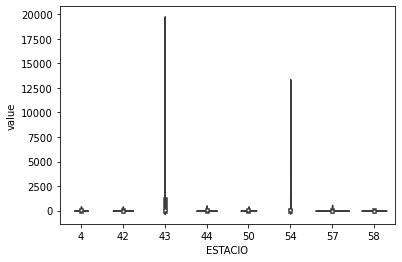

In [106]:
# Filtramos y nos quedamos con los valores de la variables correctas
import seaborn as sns

# plot
sns.violinplot(x=long_mediciones["ESTACIO"], y=long_mediciones["value"], )

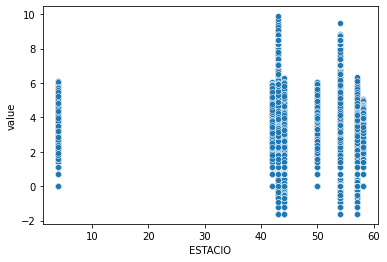

In [81]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns

# use the scatterplot function to build the bubble map
sns.scatterplot(data=long_mediciones, x="ESTACIO", y="value", legend=False, sizes=(20, 2000))

# show the graph
plt.show()